In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map

import nimare

database_file = '../nimare/tests/data/nidm_pain_dset_with_subpeaks.json'
db = nimare.dataset.Database(database_file)
ds = db.get_dataset()

kernel = nimare.meta.cbma.MKDAKernel(ds.coordinates, ds.mask)
mkda_r08 = kernel.transform(ids=ds.ids, r=8)
mkda_r09 = kernel.transform(ids=ds.ids, r=9)
mkda_r10 = kernel.transform(ids=ds.ids, r=10)
mkda_r11 = kernel.transform(ids=ds.ids, r=11)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 17.5))
plot_stat_map(mkda_r08[2], cut_coords=[-2, -10, -4],
              title='r=8mm', vmax=2, axes=axes[0],
              draw_cross=False)
plot_stat_map(mkda_r09[2], cut_coords=[-2, -10, -4],
              title='r=9mm', vmax=2, axes=axes[1],
              draw_cross=False)
plot_stat_map(mkda_r10[2], cut_coords=[-2, -10, -4],
              title='r=10mm', vmax=2, axes=axes[2],
              draw_cross=False)
plot_stat_map(mkda_r11[2], cut_coords=[-2, -10, -4],
              title='r=11mm', vmax=2, axes=axes[3],
              draw_cross=False)
fig.savefig('mkda_ma_maps.png', dpi=400)

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/duecredit/utils.py:32: PendingDeprecationWarning: dist() and linux_distribution() functions are deprecated in Python 3.5
  and platform.linux_distribution()[0] == 'debian' \
/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


In [2]:
%%time
kernel = nimare.meta.cbma.MKDAKernel(ds.coordinates, ds.mask)
mkda_res = kernel.transform(ids=ds.ids, r=10)

CPU times: user 300 ms, sys: 90 ms, total: 390 ms
Wall time: 390 ms


In [3]:
%%time
kernel = nimare.meta.cbma.KDAKernel(ds.coordinates, ds.mask)
kda_res = kernel.transform(ids=ds.ids, r=10)

CPU times: user 600 ms, sys: 190 ms, total: 790 ms
Wall time: 797 ms


In [4]:
%%time
kernel = nimare.meta.cbma.ALEKernel(ds.coordinates, ds.mask)
ale_res = kernel.transform(ids=ds.ids, n=20)

CPU times: user 320 ms, sys: 180 ms, total: 500 ms
Wall time: 504 ms


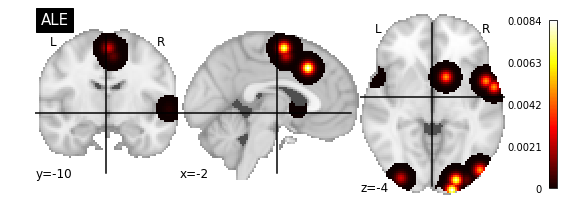

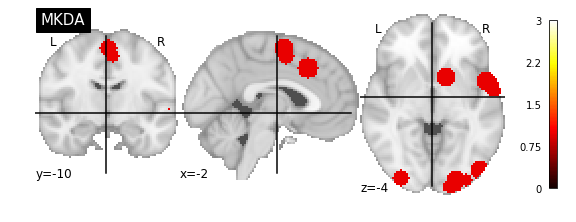

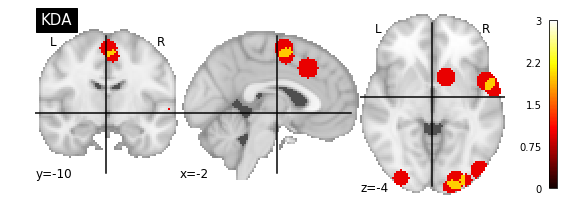

In [5]:
max_conv = np.max(kda_res[2].get_data())
plot_stat_map(ale_res[2], cut_coords=[-2, -10, -4], title='ALE')
plot_stat_map(mkda_res[2], cut_coords=[-2, -10, -4], title='MKDA', vmax=max_conv)
plot_stat_map(kda_res[2], cut_coords=[-2, -10, -4], title='KDA', vmax=max_conv)